# Interpolation

**Weiestrass Approximation Theorem**   
Let $f(x)$ be a defined and continous function for $x\in[a,b]$. $\forall \epsilon >0.\exists$ a Polynomial $P(x)$ such that $\forall x\in[a, b].|f(x) - P(x)|<\epsilon$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve, det

import sympy as sym
from sympy import symbols

In [2]:
%config InlineBackend.figure_format = "retina"

## Lagrangian Interpolation 

A Lagrange polynomial is an $n$-th degree polynomial that agrees exactly with a function $f(x)$ and $N$ distinct points.

$$
L_k(x) = \prod_{n\neq k}\frac{x - x_n}{x_k - x_i}
$$

Once we have constructed the function $L_k(x)$, the Lagrange interpolant of degree $n$ is given by

$$
P_N(x) = \sum_{k=0}^N L_k(x) f(x_k)
$$

In [3]:
def L(x, X, k):
    """
    Creates the L function for a Lagrange polynomial
    
    Parameters
    ----------
    x: float, np.array(M)
        The values at which to evaluate the function
    X: np.array(N)
        The observed values
    k: int(0, N - 1)
        the index at which to center the L function
    """
    Xk = X[k]
    X = np.delete(X, k)[:, None]
    x = x[None, :]
    num = x - X
    den = Xk - X
    values = num / den
    return values.prod(axis=-1)

In [4]:
def f(x): return 1 / (1 + 25 * x ** 2)

N, M = 5, 50
xtest = np.linspace(-1, 1, N)
x_int = np.linspace(-1, 1, M)

In [5]:
x_int[:, None, None].shape

(50, 1, 1)

In [6]:
def lagrange_interpolation(x, X, f):
    M = len(x)
    N = len(X)
    num = x[:, None, None] - X[None, None, :]
    den = X[None, :, None] - X[None, None, :]

    L = np.divide(num, den, out=np.ones((M, N, N)), where=den!=0)
    L = L.prod(axis=-1)
    approx = (f(X) * L).sum(axis=-1)
    
    return approx

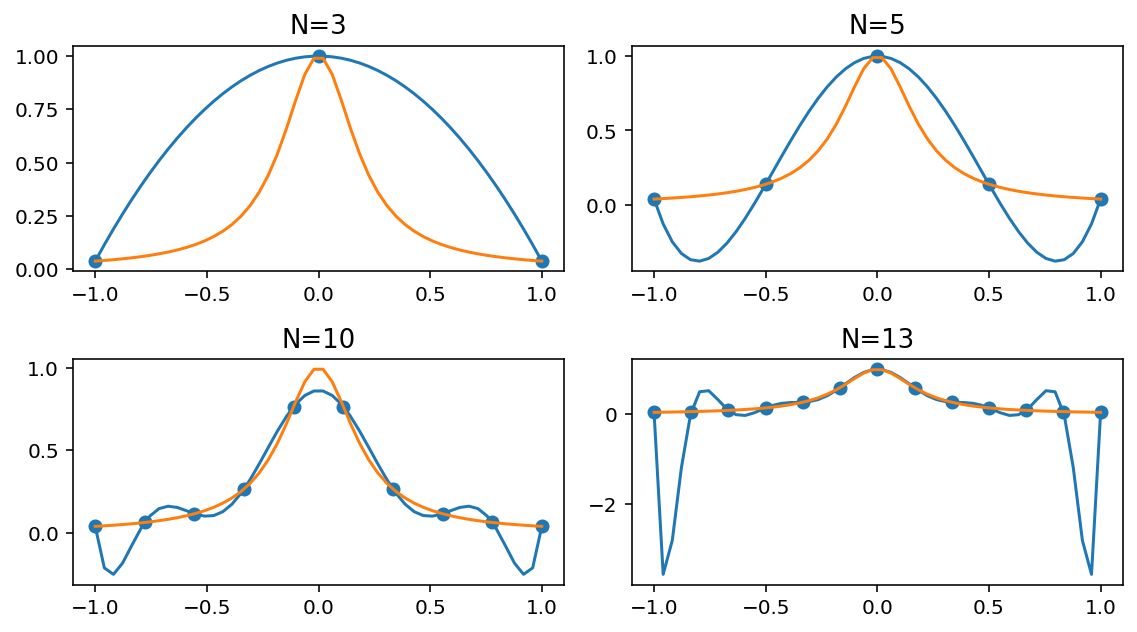

In [7]:
N_values = [3, 5, 10, 13]

fig, ax = plt.subplots(2, 2, figsize=(8, 4.5))
ax = ax.ravel()

for axi, N in zip(ax, N_values):
    xtest = np.linspace(-1, 1, N)
    f_approx = lagrange_interpolation(x_int, xtest, f)
    axi.plot(x_int, f_approx)
    axi.scatter(xtest, f(xtest))
    axi.plot(x_int, f(x_int))
    axi.set_title(f"N={N}", fontsize=13)
plt.tight_layout()

Text(0.5, 0.98, 'Differences')

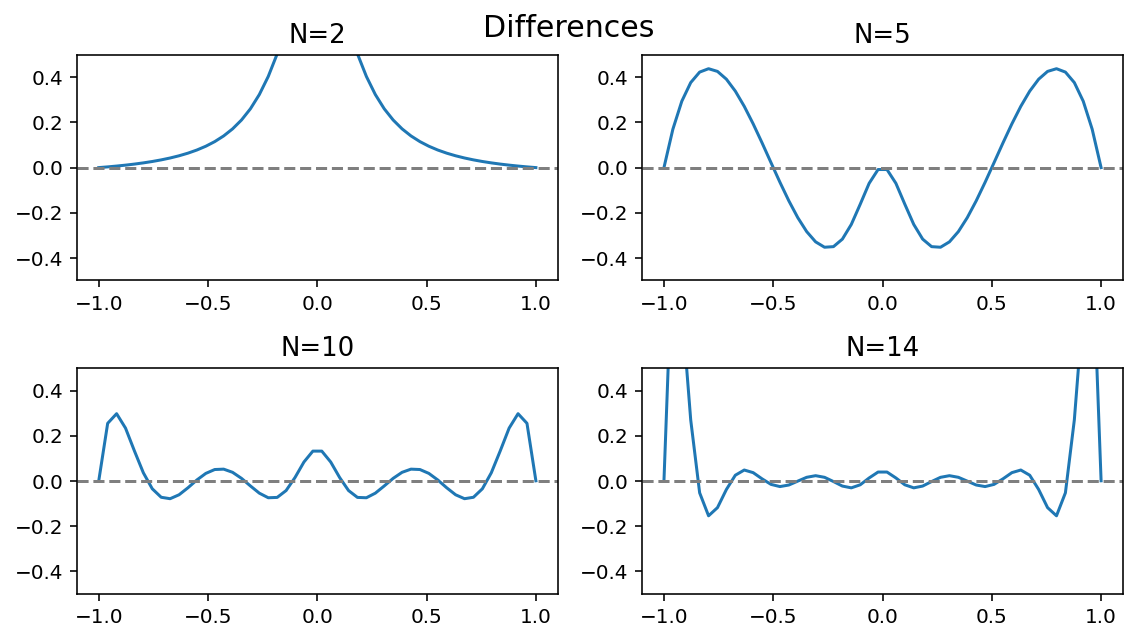

In [8]:
N_values = [2, 5, 10, 14]

fig, ax = plt.subplots(2, 2, figsize=(8, 4.5))
ax = ax.ravel()

for axi, N in zip(ax, N_values):
    xtest = np.linspace(-1, 1, N)
    f_approx = lagrange_interpolation(x_int, xtest, f)
    delta_f = f(x_int) - f_approx
    axi.plot(x_int, delta_f)
    axi.set_title(f"N={N}", fontsize=13)
    axi.set_ylim(-0.5, 0.5)
    axi.axhline(y=0, c="tab:gray", linestyle="--")
plt.tight_layout()
plt.suptitle("Differences", fontsize=15)

## Hermite Interpolation (Cubic)

We want to find the set of coefficients $\{c_p\}_{p=1}^P$ that satisfy the equation 

$$
P(x) = \sum_{p=0}^P c_p x^p
$$

and the derivative $P'(x)$ for any two consecutive points

In [10]:
unkowns = symbols("c:4")
c0, c1, c2, c3 = unkowns
x = symbols("x")
x0, x1 = symbols("x:2")
f0, f1, df0, df1 = symbols("f_0 f_1, df_0, df_1")

In [11]:
P = sum([ci * x ** p for p, ci in enumerate(unkowns)])
dP = sym.diff(P, x)

In [12]:
equations = [P.subs(x, x0) - f0, P.subs(x, x1) - f1, dP.subs(x, x0) - df0, dP.subs(x, x1) - df1]

In [13]:
equations

[c0 + c1*x0 + c2*x0**2 + c3*x0**3 - f_0,
 c0 + c1*x1 + c2*x1**2 + c3*x1**3 - f_1,
 c1 + 2*c2*x0 + 3*c3*x0**2 - df_0,
 c1 + 2*c2*x1 + 3*c3*x1**2 - df_1]

In [14]:
sol = sym.solve(equations, unkowns)

In [15]:
sol[c0]

(-df_0*x0**2*x1**2 + df_0*x0*x1**3 - df_1*x0**3*x1 + df_1*x0**2*x1**2 + 3*f_0*x0*x1**2 - f_0*x1**3 + f_1*x0**3 - 3*f_1*x0**2*x1)/(x0**3 - 3*x0**2*x1 + 3*x0*x1**2 - x1**3)

In [16]:
sol[c1]

(2*df_0*x0**2*x1 - df_0*x0*x1**2 - df_0*x1**3 + df_1*x0**3 + df_1*x0**2*x1 - 2*df_1*x0*x1**2 - 6*f_0*x0*x1 + 6*f_1*x0*x1)/(x0**3 - 3*x0**2*x1 + 3*x0*x1**2 - x1**3)

In [17]:
sol[c2]

(-df_0*x0**2 - df_0*x0*x1 + 2*df_0*x1**2 - 2*df_1*x0**2 + df_1*x0*x1 + df_1*x1**2 + 3*f_0*x0 + 3*f_0*x1 - 3*f_1*x0 - 3*f_1*x1)/(x0**3 - 3*x0**2*x1 + 3*x0*x1**2 - x1**3)

In [18]:
sol[c3]

(df_0*x0 - df_0*x1 + df_1*x0 - df_1*x1 - 2*f_0 + 2*f_1)/(x0**3 - 3*x0**2*x1 + 3*x0*x1**2 - x1**3)

In [19]:
Psol = P.subs(sol)

#### Colocation conditions

In [20]:
sym.simplify(Psol.subs(x, x0))

f_0

In [21]:
sym.simplify(Psol.subs(x, x1))

f_1

#### Osculation conditions

In [22]:
sym.simplify(sym.diff(Psol, x).subs(x, x0))

df_0

In [23]:
sym.simplify(sym.diff(Psol, x).subs(x, x1))

df_1

## Hermite interpolation implementation

**To-do**: Fix bugs (differentiation is not local; it depends on the neighboring point)

In [33]:
def dfd(x, f, eps=1e-6):
    return (f(x + eps) - f(x - eps)) / (2 * eps)

In [24]:
poly_values = xtest[:, None] ** np.arange(4)

In [31]:
poly_stack = np.stack([poly_values[:-1], poly_values[1:]], axis=-1)

In [34]:
d_poly_values = dfd(poly_values, f)

In [35]:
#dpoly_stack = np.power(xtest[:, None], np.arange(-1, 3), out=np.zeros((n_test, 4)), where=xtest[:, None] != 0)
dpoly_stack = xtest[:, None] **  np.arange(-1, 3)
dpoly_stack[:, 0] = 0

dpoly_stack = dpoly_stack * np.arange(4)[None, :]

dpoly_stack = np.stack([dpoly_stack[:-1], dpoly_stack[1:]], axis=-1)

full_stack = np.concatenate((poly_stack, dpoly_stack), axis=-1)

full_stack = np.einsum("nij->nji", full_stack)

In [36]:
fvals = f(xtest)
dfvals = dfd(xtest, f, eps=1e-1)

In [37]:
fvals = f(xtest)
dfvals = dfd(xtest, f, eps=1e-1)

In [38]:
fvals_stack = np.stack([fvals[:-1], fvals[1:]], axis=-1)
dfvals_stack = np.stack([dfvals[:-1], dfvals[1:]], axis=-1)

In [39]:
full_f_stack = np.concatenate([fvals_stack, dfvals_stack], axis=-1)

In [40]:
C_vals = solve(full_stack, full_f_stack)
C_vals.shape

(13, 4)

In [41]:
x = 1
x ** np.arange(4) @ C_vals[11, :]

0.033552737221658524

In [42]:
M = 1000
 
x_int = np.linspace(-1, 1, M)
c_int = np.argmin(np.abs(x_int[:, None] - xtest[None, :-1]), axis=1)
x_int_poly = x_int[:, None] ** np.arange(4)
hermite_x = (x_int_poly * C_vals[c_int]).sum(axis=1)

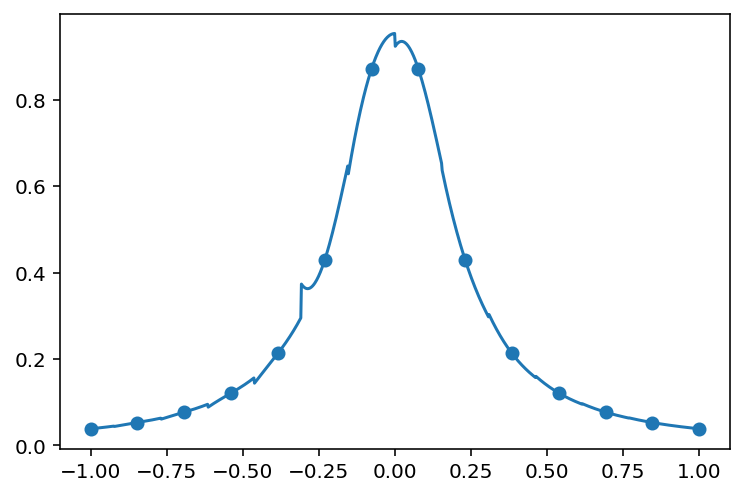

In [43]:
plt.plot(x_int, hermite_x)
plt.scatter(xtest, f(xtest))

## Scipy test

In [58]:
from scipy.interpolate import CubicHermiteSpline

In [70]:
spline = CubicHermiteSpline(xtest, f(xtest), dfd(xtest, f))

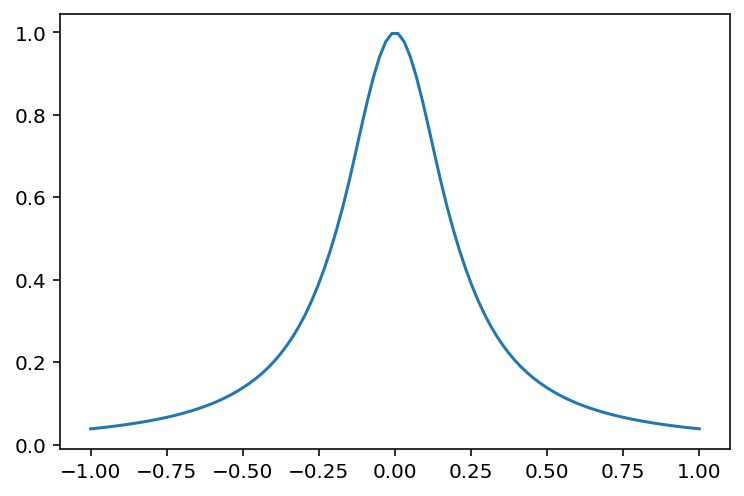

In [73]:
plt.plot(x_int, spline(x_int))